In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [53]:
ttrain = pd.read_csv('tam_training_data_hum_ai.csv')
ttest = pd.read_excel('tam_test_data_hum_ai.xlsx')
mtrain = pd.read_csv('mal_training_data_hum_ai.csv')
mtest = pd.read_excel('mal_test_data_hum_ai.xlsx')

## Dataset Info

In [3]:
ttrain.shape, ttest.shape, mtrain.shape, mtest.shape

((808, 3), (100, 2), (800, 3), (200, 2))

In [4]:
ttrain.isnull().sum(), ttest.isnull().sum(), mtrain.isnull().sum(), mtest.isnull().sum()

(ID       0
 DATA     0
 LABEL    0
 dtype: int64,
 ID      0
 DATA    0
 dtype: int64,
 ID       0
 DATA     0
 LABEL    0
 dtype: int64,
 ID      0
 DATA    0
 dtype: int64)

In [5]:
ttrain.info(), ttest.info(), mtrain.info(), mtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      808 non-null    object
 1   DATA    808 non-null    object
 2   LABEL   808 non-null    object
dtypes: object(3)
memory usage: 19.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      100 non-null    object
 1   DATA    100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      800 non-null    object
 1   DATA    800 non-null    object
 2   LABEL   800 non-null    object
dtypes: object(3)
memory usage: 18.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 

(None, None, None, None)

In [6]:
ttrain.head()

,ID,DATA,LABEL
0,TAM_HUAI_TR_001,இந்த சோப்பின் மணம் மிகவும் புத்துணர்ச்சியூட்டு...,AI
1,TAM_HUAI_TR_002,தோலை நன்கு சுத்தம் செய்ய இது மிகவும் சிறப்பானது.,AI
2,TAM_HUAI_TR_003,"இதைப் பயன்படுத்திய பிறகு, தோல் மிக மென்மையாக உ...",AI
3,TAM_HUAI_TR_004,இந்த சோப்பில் இயற்கையான மூலப்பொருட்கள் பயன்படு...,AI
4,TAM_HUAI_TR_005,"சிறிது சோப்பு போதும், அதிக நுரை உருவாகிறது.",AI


In [7]:
ttest.head()

,ID,DATA
0,TAM_HUAI_TE_001,நான் அண்மையில் வாங்கிய ஒரு வாட்டர் பாட்டில் ம...
1,TAM_HUAI_TE_002,அணிவதற்கு நன்றாக இருக்கும்
2,TAM_HUAI_TE_003,அதிக வாசனை வாந்தி
3,TAM_HUAI_TE_004,அதிகமக பயன்பதுதினல் தலை சுட்ரும்
4,TAM_HUAI_TE_005,அழகாக இருக்கும்


In [54]:
mtrain.head()

,ID,DATA,LABEL
0,MAL_HUAI_TR_001,ഞാൻ കുറച്ച് കാലമായി മുച്ചട്ച്ചിൻ്റെ ഫേസ് വാഷ് ...,HUMAN
1,MAL_HUAI_TR_002,ഈ ഫേസ് വാഷ് തണുപ്പ് വെതറിലും ഉപയോഗിക്കാം,HUMAN
2,MAL_HUAI_TR_003,അണ്ണാ എനിക്ക് 14 വയസ് ആയ തേയോളു എനിക്ക് സ്കിൻക...,HUMAN
3,MAL_HUAI_TR_004,ബ്രോ ഇതെല്ലം യൂസ് ആക്കീട്ട് നൈറ്റ് പിന്നെ വേറ...,HUMAN
4,MAL_HUAI_TR_005,ഇത് ഫേസ് വാഷ് ഡെയിലി ചെയ്താ സ്കിൻകെയറിന് നല്ലതാ,HUMAN


In [14]:
mtest.head()

,ID,DATA
0,MAL_HUAI_TE_001,എല്ലാം നന്നായിട്ടുണ്ട് പക്ഷെ എനിക്ക് മീനിന്റെ ...
1,MAL_HUAI_TE_002,ബിലാൽ തട്ടുകടയിൽ നിന്നും പഴകിയ ഫുഡ് കുറെ പ്രാവ...
2,MAL_HUAI_TE_003,കോവയ്ക്ക ഉപ്പിലിട്ടത് എൻറെ ജീവിതത്തിൽ ഇതുവരെ ക...
3,MAL_HUAI_TE_004,കേരളത്തിൽ ഏറ്റവും നല്ല ഭക്ഷണം കിട്ടുന്നത് കോഴി...
4,MAL_HUAI_TE_005,"എല്ലാം അടിപൊളി, പക്ഷെ സുരേന്ദ്രൻ തട്ടുകടയിൽ തി..."


In [79]:
ttrain['count'] = ttrain['DATA'].apply(lambda x: len(x.split()))
ttest['count'] = ttest['DATA'].apply(lambda x: len(x.split()))

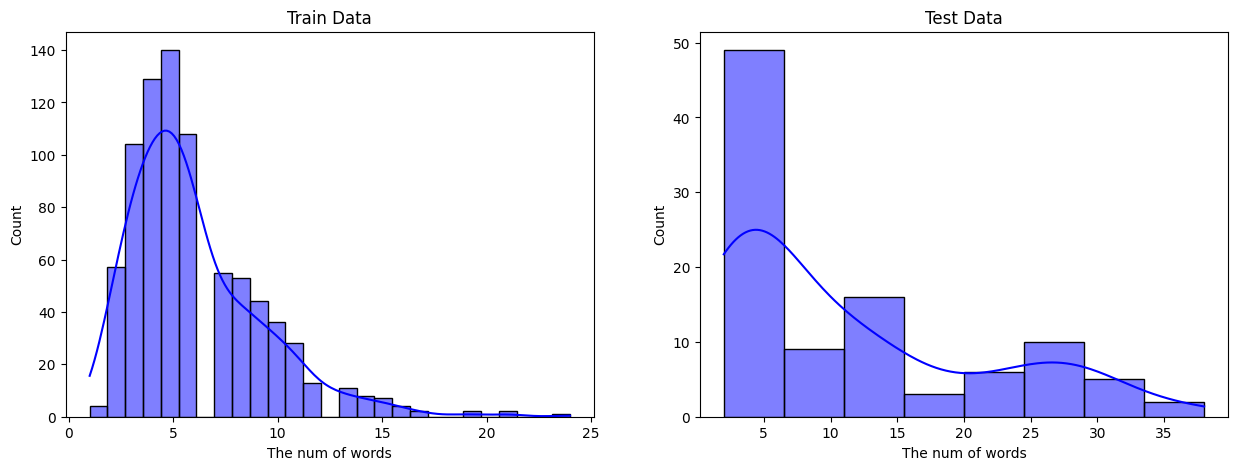

In [84]:
fig,axes = plt.subplots(1,2, figsize=(15,5))
sns.histplot(ttrain['count'],ax=axes[0], color="blue", kde=True)
axes[0].set_xlabel("The num of words")
axes[0].set_ylabel("Count")
axes[0].set_title("Train Data")


sns.histplot(ttest['count'],ax=axes[1], color="blue", kde=True)
axes[1].set_xlabel("The num of words")
axes[1].set_ylabel("Count")
axes[1].set_title("Test Data")

plt.show()

In [83]:
mtrain['count'] = mtrain['DATA'].apply(lambda x: len(x.split()))
mtest['count'] = mtest['DATA'].apply(lambda x: len(x.split()))

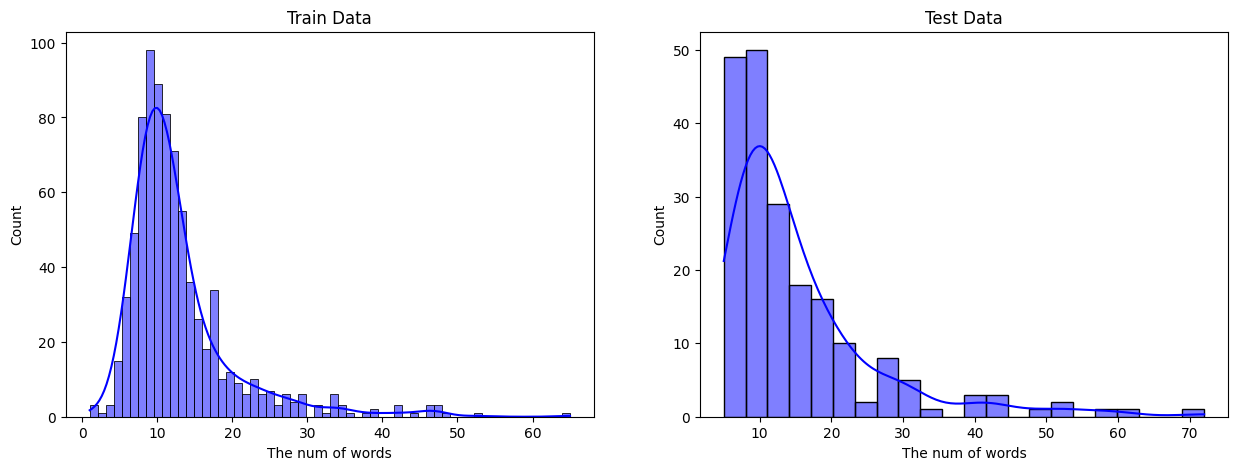

In [85]:
fig,axes = plt.subplots(1,2, figsize=(15,5))

sns.histplot(mtrain['count'],ax=axes[0], color="blue", kde=True)
axes[0].set_xlabel("The num of words")
axes[0].set_ylabel("Count")
axes[0].set_title("Train Data")


sns.histplot(mtest['count'],ax=axes[1], color="blue", kde=True)
axes[1].set_xlabel("The num of words")
axes[1].set_ylabel("Count")
axes[1].set_title("Test Data")

plt.show()

# **Tamil**

## Preprocessing

In [8]:
import re

def preprocess(text):
    text = re.sub(r'[😀-🙿]',' ',text)
    text = re.sub(r'\s+',' ',text)
    text = re.sub(r'<[^>]*>',' ',text)
    text = re.sub(r'http\S+|www\S+|https\S+',' ',text)
    text = re.sub(r'\([^)]*\)', ' ', text)
    text = re.sub(r'[^\u0B80-\u0BFFa-zA-Z0-9\s]',' ',text).strip()
    text = text.lower()

    return text

In [9]:
ttrain['preprocess_data'] = ttrain['DATA'].apply(preprocess)
ttest['preprocess_data'] = ttest['DATA'].apply(preprocess)

ttrain['LabelValue'] = ttrain['LABEL'].apply(lambda x: 1 if x == 'HUMAN' else 0)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from transformers import DataCollatorWithPadding
from transformers import TrainingArguments, Trainer

import torch
from torch.utils.data import DataLoader,Dataset

In [20]:
vectorizer = TfidfVectorizer()

In [33]:
train_data, val_data = train_test_split(ttrain, test_size=0.2, random_state=42)

X_train = vectorizer.fit_transform(train_data['preprocess_data'])
y_train = train_data['LabelValue']

X_val = vectorizer.transform(val_data['preprocess_data'])
y_val = val_data['LabelValue']

## Statistical ML models

In [34]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = lr_model.predict(X_val)
accuracy_score(y_val, y_pred)

0.8209876543209876

In [26]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
y_pred = dt_model.predict(X_val)
accuracy_score(y_val, y_pred)

0.8395061728395061

In [36]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
y_pred = rf_model.predict(X_val)
accuracy_score(y_val, y_pred)

0.9012345679012346

In [30]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [32]:
y_pred = svm_model.predict(X_val)
accuracy_score(y_val, y_pred)

0.8765432098765432

## Hugging Face Transformers


In [ ]:
x_train = list(train_data['preprocess_data'])
y_train = list(train_data['LabelValue'])

x_val = list(val_data['preprocess_data'])
y_val = list(val_data['LabelValue'])

x_test = list(ttest['preprocess_data'])

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification
bert_model = "l3cube-pune/tamil-bert"
tokenizer = AutoTokenizer.from_pretrained(bert_model)
model = AutoModelForSequenceClassification.from_pretrained(bert_model,num_labels=2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/6.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/951M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at l3cube-pune/tamil-bert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_encodings = tokenizer(x_train, truncation=True)
val_encodings = tokenizer(x_val, truncation=True)
test_encodings = tokenizer(x_test, truncation=True)

In [ ]:
class tamilDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.encodings["input_ids"])

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
          item['labels'] = torch.tensor(self.labels[idx])
        return item

In [ ]:
train_dataset = tamilDataset(train_encodings,y_train)
val_dataset = tamilDataset(val_encodings,y_val)
test_dataset = tamilDataset(test_encodings,None)

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
training_args = TrainingArguments(
    output_dir='./t3results',
    per_device_train_batch_size=32,
    per_device_eval_batch_size=16,
    num_train_epochs=20,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir='./t3logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    seed = 42
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = predictions.argmax(axis=1)

    # Compute metrics
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="weighted")

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    data_collator = data_collator
)

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.688200,0.680436,0.833333,0.834172,0.833333,0.833467
2,0.653200,0.624783,0.851852,0.853162,0.851852,0.851988
3,0.590700,0.567587,0.876543,0.878073,0.876543,0.876087
4,0.528800,0.519686,0.901235,0.903888,0.901235,0.901325
5,0.480000,0.485120,0.907407,0.908626,0.907407,0.907141
6,0.436500,0.443185,0.919753,0.922521,0.919753,0.919385
7,0.395500,0.428735,0.895062,0.897506,0.895062,0.894581
8,0.366600,0.401123,0.901235,0.906788,0.901235,0.900470
9,0.339200,0.370317,0.907407,0.911937,0.907407,0.906796
10,0.274200,0.349941,0.913580,0.917180,0.913580,0.913100


TrainOutput(global_step=420, training_loss=0.3335097332795461, metrics={'train_runtime': 612.4842, 'train_samples_per_second': 21.094, 'train_steps_per_second': 0.686, 'total_flos': 173001685564560.0, 'train_loss': 0.3335097332795461, 'epoch': 20.0})

In [ ]:
eval_results = trainer.evaluate()
print("accuracy_score", round(eval_results['eval_accuracy'], 2))
print("precision_score", round(eval_results['eval_precision'], 2))
print("recall_score", round(eval_results['eval_recall'], 2))
print("f1_score", round(eval_results['eval_f1'], 2))

accuracy_score 0.93
precision_score 0.93
recall_score 0.93
f1_score 0.93


In [ ]:
predictions = trainer.predict(test_dataset)
predictions

PredictionOutput(predictions=array([[-0.31926888,  0.3028837 ],
       [-0.9848879 ,  0.9552913 ],
       [-0.9848945 ,  0.9555152 ],
       [-0.98497427,  0.95536816],
       [-0.98481816,  0.95514476],
       [-0.9845171 ,  0.95476955],
       [-0.98488724,  0.9553738 ],
       [-0.98494095,  0.9554416 ],
       [ 0.9638743 , -0.94044757],
       [ 0.9640046 , -0.9406294 ],
       [ 0.96450204, -0.941231  ],
       [ 0.9642492 , -0.9410289 ],
       [ 0.96436054, -0.94094414],
       [ 0.9574675 , -0.9338419 ],
       [ 0.96368104, -0.939679  ],
       [ 0.95887953, -0.9338785 ],
       [ 0.96307576, -0.93951744],
       [ 0.96322095, -0.94006443],
       [ 0.9604339 , -0.937178  ],
       [ 0.9616423 , -0.93794703],
       [ 0.9618046 , -0.9385885 ],
       [ 0.9626377 , -0.939383  ],
       [ 0.9581076 , -0.934834  ],
       [ 0.96437097, -0.94078094],
       [ 0.96342814, -0.93981284],
       [ 0.9642531 , -0.9411395 ],
       [ 0.96373767, -0.9401076 ],
       [ 0.96254855, -0.93

In [ ]:
preds = predictions.predictions.argmax(axis=-1)

In [ ]:
preds = preds.tolist()
output = pd.DataFrame(preds)

In [ ]:
Tamil_output = pd.concat([ttest,output],axis=1)
Tamil_output.rename(columns={0:'LABEL'},inplace=True)
Tamil_output.to_csv('Tamil_output.csv',index=False)

# **Malayalam**

## Preprocessing

In [55]:
mtrain['LabelValue'] = mtrain['LABEL'].apply(lambda x: 1 if x == 'HUMAN' else 0)

In [56]:
import re

def preprocess(text):
    text = re.sub(r'[😀-🙿]',' ',text)
    text = re.sub(r'\s+',' ',text)
    text = re.sub(r'<[^>]*>',' ',text)
    text = re.sub(r'http\S+|www\S+|https\S+',' ',text)
    text = re.sub(r'\([^)]*\)', ' ', text)
    text = re.sub(r'[^\u0D00-\u0DFFa-zA-Z0-9\s]',' ',text)
    text = text.lower().strip()

    return text

In [57]:
mtrain['preprocess_data'] = mtrain['DATA'].apply(preprocess)
mtest['preprocess_data'] = mtest['DATA'].apply(preprocess)

## Fasttext

In [40]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296227 sha256=53d1eac1204e31f495b06ca74bde68c8d74f1413de91a2fa44215a8d68e6e3fe
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [58]:
import fasttext
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [59]:
train_data,val_data = train_test_split(mtrain,test_size=0.2,random_state=42)

In [64]:
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
train_data.head()

,ID,DATA,LABEL,LabelValue,preprocess_data
0,MAL_HUAI_TR_265,ഫസ്റ്റ് കാണിച്ച ബാഗ് ഞാൻ വാങ്ങിച്ചിരുന്നു ഇട്സ...,HUMAN,1,ഫസ്റ്റ് കാണിച്ച ബാഗ് ഞാൻ വാങ്ങിച്ചിരുന്നു ഇട്സ...
1,MAL_HUAI_TR_616,"വൈറ്റ് ലോട്ടസ്, സെറ്റഫിൽ എന്നിവയുടെ ഫലങ്ങൾ എനി...",AI,0,വൈറ്റ് ലോട്ടസ് സെറ്റഫിൽ എന്നിവയുടെ ഫലങ്ങൾ എനി...
2,MAL_HUAI_TR_330,ഞാൻ കേരളാ വിഷൻറെ 60 എംബി പ്ലാൻ ആയിരുന്നു ഉപയോഗ...,HUMAN,1,ഞാൻ കേരളാ വിഷൻറെ 60 എംബി പ്ലാൻ ആയിരുന്നു ഉപയോഗ...
3,MAL_HUAI_TR_343,എടുക്കരുതേ.. പറയുന്ന സ്പീഡ് ഒന്നും കിട്ടില്ല. ...,HUMAN,1,എടുക്കരുതേ പറയുന്ന സ്പീഡ് ഒന്നും കിട്ടില്ല ...
4,MAL_HUAI_TR_395,അവിടുത്തെ ഊണ് അടിപൊളി ആണ്.. കുറച്ചു മുൻപ് ആ വഴ...,HUMAN,1,അവിടുത്തെ ഊണ് അടിപൊളി ആണ് കുറച്ചു മുൻപ് ആ വഴ...


In [65]:
train_data['Text_Label'] = train_data['LABEL'].apply(lambda x: '__label__' + x.lower()) + " " + train_data['preprocess_data']

In [66]:
train_data.to_csv('train_data',columns=['Text_Label'],index=False,header=False)

In [73]:
ft_model = fasttext.train_supervised('train_data')

In [76]:
def predict_label(x):
    return ft_model.predict(x)[0][0].split('__')[-1].upper()

y_pred = val_data['preprocess_data'].apply(predict_label)
accuracy_score(val_data['LABEL'],y_pred)

0.5625

## LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense,BatchNormalization, Dropout,Bidirectional
from tensorflow.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(mtrain['preprocess_data'])

vocabulory_size = len(tokenizer.word_index)+1
vocabulory_size

4662

In [ ]:
sequences = tokenizer.texts_to_sequences(mtrain['preprocess_data'])

padded_sequences = pad_sequences(sequences, padding='post')

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, mtrain['LabelText'], test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(640, 63)

In [ ]:
X_val.shape

(160, 63)

In [ ]:
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64,embeddings_initializer='uniform',input_shape=(None,)),
    Bidirectional(LSTM(64, return_sequences=False, dropout=0.2,recurrent_dropout=0.2)),
    BatchNormalization(),

    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),


    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, None, 64)            │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 397,569 (1.52 MB)

 Trainable params: 397,313 (1.52 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
lstm_model.fit(X_train, y_train,epochs=15, validation_data = (X_val,y_val) ,batch_size=32,verbose=2)

Epoch 1/15
20/20 - 17s - 840ms/step - accuracy: 0.5094 - loss: 0.6934 - val_accuracy: 0.6438 - val_loss: 0.6918
Epoch 2/15
20/20 - 3s - 157ms/step - accuracy: 0.6672 - loss: 0.6517 - val_accuracy: 0.6250 - val_loss: 0.6880
Epoch 3/15
20/20 - 3s - 127ms/step - accuracy: 0.7812 - loss: 0.5066 - val_accuracy: 0.7125 - val_loss: 0.6584
Epoch 4/15
20/20 - 3s - 139ms/step - accuracy: 0.9250 - loss: 0.2350 - val_accuracy: 0.8062 - val_loss: 0.5786
Epoch 5/15
20/20 - 4s - 192ms/step - accuracy: 0.9781 - loss: 0.0777 - val_accuracy: 0.7375 - val_loss: 0.5472
Epoch 6/15
20/20 - 4s - 206ms/step - accuracy: 0.9969 - loss: 0.0258 - val_accuracy: 0.7437 - val_loss: 0.5154
Epoch 7/15
20/20 - 5s - 233ms/step - accuracy: 0.9953 - loss: 0.0169 - val_accuracy: 0.7563 - val_loss: 0.5000
Epoch 8/15
20/20 - 6s - 276ms/step - accuracy: 0.9969 - loss: 0.0092 - val_accuracy: 0.7437 - val_loss: 0.5021
Epoch 9/15
20/20 - 4s - 201ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.7563 - val_loss: 0.4944


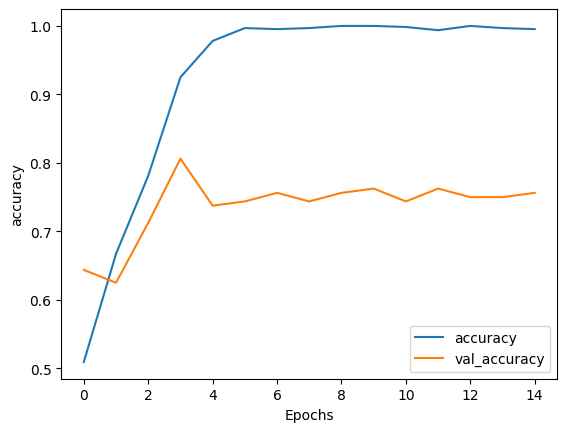

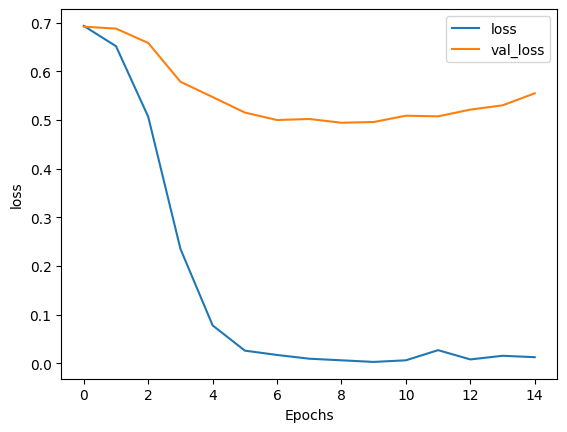

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(lstm_model.history, 'accuracy')
plot_graphs(lstm_model.history, 'loss')

In [ ]:
scores = lstm_model.evaluate(X_val, y_val)
print(f"Accuracy: {scores[1]*100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.7668 - loss: 0.5334
Accuracy: 75.63%


In [ ]:
X_test = tokenizer.texts_to_sequences(mtest['preprocess_data'])
X_test = pad_sequences(X_text, padding='post')

y_pred_test = lstm_model.predict(X_test,batch_size=32)
y_pred_test = (y_pred_test > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 457ms/step


## Hugging Face Transformers

In [ ]:
import torch

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
# import evaluate
from transformers import DataCollatorWithPadding
from transformers import TrainingArguments, Trainer

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification
model_name = "l3cube-pune/malayalam-bert"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name,num_labels=2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/6.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/664 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/951M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at l3cube-pune/malayalam-bert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
x_train,x_val,y_train,y_val = train_test_split(mtrain['preprocess_data'],mtrain['LabelText'],test_size=0.2,random_state=42)

In [ ]:
x_train = list(x_train)
x_val = list(x_val)

y_train = list(y_train)
y_val = list(y_val)

In [ ]:
train_encodings = tokenizer(x_train,truncation=True)
val_encodings = tokenizer(x_val,truncation=True)

In [ ]:
from torch.utils.data import DataLoader,Dataset

In [ ]:
class malayDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.encodings["input_ids"])

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
          item['labels'] = torch.tensor(self.labels[idx])
        return item

In [ ]:
train_dataset = malayDataset(train_encodings,y_train)
val_dataset = malayDataset(val_encodings,y_val)

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=-1)

    accuracy = accuracy_score(labels, predictions)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')

    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall,
    }


In [ ]:
training_args = TrainingArguments(
    output_dir='./ml_results',
    per_device_train_batch_size=32,
    per_device_eval_batch_size=16,
    num_train_epochs=20,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir='./mllogs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    seed = 42
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    data_collator = data_collator
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.686700,0.673522,0.500000,0.333333,0.250000,0.500000
2,0.635600,0.624430,0.868750,0.868622,0.870196,0.868750
3,0.573200,0.570024,0.868750,0.866873,0.890793,0.868750
4,0.521500,0.533081,0.862500,0.860737,0.881830,0.862500
5,0.471500,0.502451,0.862500,0.859850,0.892157,0.862500
6,0.425400,0.468562,0.875000,0.874293,0.883632,0.875000
7,0.392000,0.463559,0.856250,0.853730,0.882615,0.856250
8,0.347300,0.408792,0.893750,0.893546,0.896788,0.893750
9,0.300500,0.403278,0.881250,0.880873,0.886137,0.881250
10,0.294300,0.418362,0.856250,0.856199,0.856752,0.856250


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=400, training_loss=0.3423640722036362, metrics={'train_runtime': 697.3936, 'train_samples_per_second': 18.354, 'train_steps_per_second': 0.574, 'total_flos': 465196790317440.0, 'train_loss': 0.3423640722036362, 'epoch': 20.0})

In [ ]:
eval_results = trainer.evaluate()
print("\nFinal Evaluation Results:")
for metric_name, value in eval_results.items():
    print(f"{metric_name}: {value:.4f}")


Final Evaluation Results:
eval_loss: 0.3935
eval_accuracy: 0.8562
eval_f1: 0.8558
eval_precision: 0.8608
eval_recall: 0.8562
eval_runtime: 0.5151
eval_samples_per_second: 310.6370
eval_steps_per_second: 19.4150
epoch: 20.0000


In [ ]:
x_test = list(mtest['preprocess_data'])
test_encodings = tokenizer(x_test,truncation=True)

test_dataset = malayDataset(test_encodings,None)


In [ ]:
y_pred = trainer.predict(test_dataset)
y_pred

PredictionOutput(predictions=array([[ 0.9130208 , -0.9607542 ],
       [ 0.906049  , -0.9551421 ],
       [ 0.89603883, -0.9462525 ],
       [-0.92525816,  0.99069065],
       [-0.9251027 ,  0.99045825],
       [-0.92533284,  0.9905859 ],
       [-0.92524165,  0.9904453 ],
       [-0.9253893 ,  0.9907041 ],
       [-0.92523223,  0.99064094],
       [-0.92533165,  0.99063104],
       [ 0.91350603, -0.960658  ],
       [-0.9250694 ,  0.99023676],
       [ 0.91244566, -0.9603382 ],
       [-0.9253158 ,  0.9907423 ],
       [ 0.9092943 , -0.95925325],
       [ 0.91210085, -0.9603753 ],
       [-0.92404795,  0.98975587],
       [-0.9251792 ,  0.9911308 ],
       [-0.9201409 ,  0.98435146],
       [-0.9251349 ,  0.99077696],
       [-0.77125996,  0.8131048 ],
       [-0.9250728 ,  0.9908486 ],
       [-0.92516136,  0.990334  ],
       [ 0.84960455, -0.90122163],
       [-0.92308336,  0.9888595 ],
       [-0.9251918 ,  0.9904033 ],
       [ 0.91327226, -0.9609673 ],
       [-0.9247884 ,  0.99

In [ ]:
ml_output = np.argmax(y_pred.predictions, axis=-1)

ml_output = pd.DataFrame(ml_output)

In [ ]:
Malayalam_output = pd.concat([mtest,ml_output],axis=1)
Malayalam_output.rename(columns={0:'LABEL'},inplace=True)
Malayalam_output.to_csv('Malayalam_output.csv',index=False)